<a href="https://colab.research.google.com/github/boemer00/deep_learning/blob/main/TF2_0_moores_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1 - Load

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import StandardScaler

In [42]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'
df = pd.read_csv(url, header=None).values

X = df[:,0].reshape(-1, 1)  # make it a 2-D array of size N x D where D = 1
y = df[:,1]


1.  **`df[:, 0]`**: This syntax slices the DataFrame df to extract all rows from the first column (index 0), which corresponds to the "Feature" column. The result is a 1-dimensional array (a pandas Series) containing the values of the "Feature" column.

2.   **`.reshape(-1, 1)`**: The .reshape() method is applied to transform the 1-dimensional array into a 2-dimensional array (matrix) of size N x 1, where N is the number of samples in the dataset. The -1 argument in .reshape(-1, 1) means that you want NumPy to automatically infer the appropriate number of rows (N) based on the number of elements in the array. The 1 argument indicates that you want one column in the reshaped matrix. This reshaping is necessary because many machine learning algorithms in Python, including scikit-learn and Keras, expect the input data X to be a 2D array, even if it has only one feature.



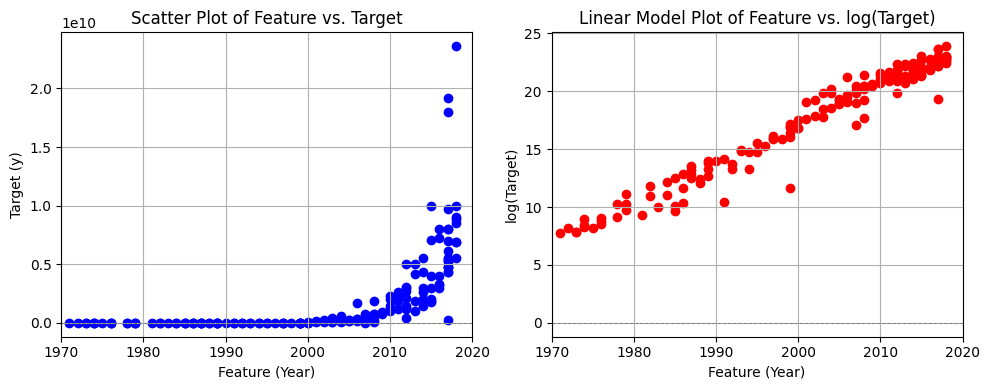

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 4))

# Scatter plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1 (left side)
plt.scatter(X, y, color='b', marker='o', label='Data Points')
plt.xlabel('Feature (Year)')
plt.ylabel('Target (y)')
plt.title('Scatter Plot of Feature vs. Target')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='dashed', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=0.7)
plt.xlim(1970, 2020)  # Set x-axis limits to start at 1970 and go to 2020

# Linear model plot with log(y)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2 (right side)
plt.scatter(X, np.log(y), color='r', marker='o', label='Data Points (y = log(y))')
plt.xlabel('Feature (Year)')
plt.ylabel('log(Target)')
plt.title('Linear Model Plot of Feature vs. log(Target)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='dashed', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=0.7)
plt.xlim(1970, 2020)  # Set x-axis limits to start at 1970 and go to 2020

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show();



In [44]:
# Given the above, take the log of y to find a linear pattern
y = np.log(y)

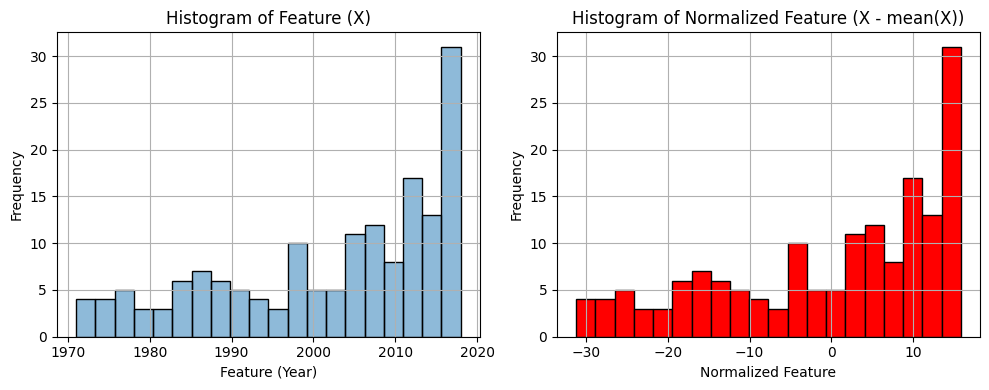

In [45]:
# Create the figure and axes for the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Histogram of X using Seaborn
sns.histplot(data=X, bins=20, color='b', kde=False, ax=ax1)
ax1.set_xlabel('Feature (Year)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Feature (X)')
ax1.grid(True)

# Histogram of X normalized around zero using Seaborn
X_normalized = X - np.mean(X)
sns.histplot(data=X_normalized, bins=20, color='r', kde=False, ax=ax2)
ax2.set_xlabel('Normalized Feature')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Normalized Feature (X - mean(X))')
ax2.grid(True)

# Remove the legend from both histograms
ax1.legend_.remove()
ax2.legend_.remove()

# Manually set the color for the bars in the right histogram to red
for patch in ax2.patches:
    patch.set_facecolor('r')

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [46]:
# Given the above let's centre the data around zero by subtracting the mean
X = X - X.mean()

## Part 2: Initialize Model

In [47]:
def initialize_model():
  # architecture
  model = Sequential()
  model.add(Dense(1, input_shape=(1,)))

  # compile
  model.compile(loss='mse',
                optimizer=SGD(0.001, 0.9))

  return model

In [48]:
# learning rate scheduler
def scheduler(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

In [49]:
# train model
model = initialize_model()

history = model.fit(X, y,
                    epochs=200,
                    callbacks=[lr_scheduler],
                    verbose=0)

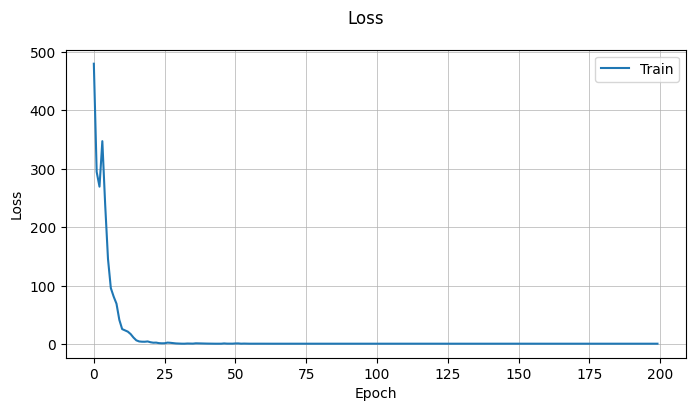

In [50]:
import matplotlib.pyplot as plt

def plot_loss(history, title=None):
    fig, ax = plt.subplots(figsize=(8,4))

    # --- LOSS ---

    ax.plot(history.history['loss'])

    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')

    ax.legend(['Train', 'Test'], loc='best')

    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss(history, title='Loss')


In [51]:
# Get the slope of the line
# The slope is related to the doubling rate of the transistor count
print(model.layers)  # there is only 1 layer, the "input" layer does not count
print(model.layers[0].get_weights())

[array([[0.34458905]], dtype=float32), array([17.766363], dtype=float32)]


The first array `[[0.34231713]]` represents `W` and the second array `[17.753796]` represents `b`.


`W` is a **2D** array, whereas `b` is a **1D** array even though both contain only one number. This is different from the linear regression equation where `W` is a **vector** and `b` is a **scaler**. This is because it is a general version of the Dense layer, where we could have multiple outputs.

if:
- D = input_size
- M = output_size

then:
- W.shape = (D,M) matrix
- b.shape = (M,) vector



In [52]:
# The slope of the line
a = model.layers[0].get_weights()[0][0,0]
a

0.34458905

index at `0` to the get `W`

index again at `[0,0]` to get the scaler value

Our original model for exponential growth is:

$C = A_0 \cdot r^t$

Where $C$ is the transistor count and $t$ is the year.

$r$ is the rate of growth. For example, when $t$ goes from 1 to 2, $C$ increases by a factor of $r$. When $t$ goes from 2 to 3, $C$ increases by a factor of $r$ again. When we take the log of both sides, we get:

$\log{C} = \log{r} \cdot t + \log{A_0}$

This is our linear equation:

$\hat{y} = a \cdot x + b$

Where:

$\hat{y} = \log{C}$

$a = \log{r}$

$x = t$

$b = \log{A_0}$

We are interested in $r$, because that's the rate of growth. Given our regression weights, we know that:

$a = 0.34188038$

so that:

$r = e^{0.34188038} = 1.4076$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $C$ to increase to $2C$. Let's call the original starting time $t$, to correspond with the initial transistor count $C$. Let's call the end time $t'$, to correspond with the final transistor count $2C$. Then we also have:

$2C = A_0 \cdot r^{t'}$

Combine this with our original equation:

$C = A_0 \cdot r^t$

We get (by dividing the 2 equations):

$\frac{2C}{C} = \frac{A_0 \cdot r^{t'}}{A_0 \cdot r^t}$

Which simplifies to:

$2 = r^{t' - t}$

Solve for $t' - t$:

$t' - t = \frac{\log{2}}{\log{r}} = \frac{\log{2}}{a}$

Important note! We haven't specified what the starting time $t$ actually is, and we don't have to since we just proved that this holds for any $t$.


In [53]:
print('Time to double: ', np.log(2)/a)

Time to double:  2.0115182747047053


In [54]:
# analytical solution
X = np.array(X).flatten()
y = np.array(y)

denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(y) - y.mean()*X.sum() ) / denominator
b = ( y.mean() * X.dot(X) - X.mean() * X.dot(y) ) / denominator

print(a, b)
print('Time to double: ', np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204


# Part 3: Prediction

In [55]:
print(model.predict(X).shape) # we get: 2D (Nx1) matrix
print(model.predict(X).flatten().shape) # we want: 1D N length vector

6/6 [==============================] - 0s 2ms/step
(162, 1)
6/6 [==============================] - 0s 2ms/step
(162,)


we flatten so `y_hat` has the same shape as `y`

6/6 [==============================] - 0s 1ms/step


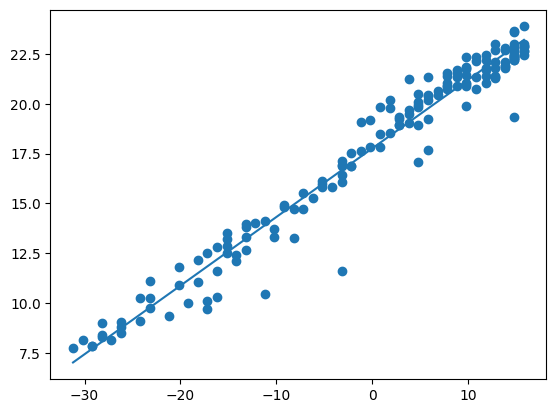

In [56]:
# Make sure the line fits our data
y_hat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, y_hat)

Now, let's check whether the Dense layers does in fact do the linear transformation.

In [57]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
y_hat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(y_hat, y_hat2)

True

## Part 4: Saving and Loading the Model

In [58]:
# Save the model to a file
model.save('linear_model_moores.h5')

In [59]:
# Check if the model has been saved locally
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jul 27 07:01 linear_model_moores.h5
drwxr-xr-x 1 root root 4.0K Jul 25 13:33 sample_data


In [61]:
from keras.models import load_model

# Load the model & check if it still works
model = load_model('linear_model_moores.h5')
print(model.layers)
model.evaluate(X, y)

6/6 [==============================] - 0s 2ms/step - loss: 0.8718


0.8718147873878479

In [62]:
# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('linear_model_moores.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>